#**Problem Set 2**

##**Question 1**
Consider the following Python module:

In [ ]:
a = 0

def b():
    global a
    a = c(a)

def c(a):
    return a + 2

After importing the module into the interpreter, you execute:
    
    >>> b()
    >>> b()
    >>> b()
    >>> a

What value is displayed when the last expression (a) is evaluated? Explain your answer by indicating what happens in every executed statement.

In [ ]:
# Answer
b()
print(a)
b()
print(a)
b()
print(a)

2
4
6


It displays 6. The variable a is defined as global in function b(), this changes its scope from local to global, therefore the change/definition in the function persists for rest of the code, even after function execution. Due to that in each execution of b(), 2 is added to the variable value. b() is executed 3 times resulting in value 6 (2+2+2) of variable a.

##**Question 2**

In [ ]:
def file_length(file_name):
    try:
        file = open(file_name)
        contents = file.read()
    except FileNotFoundError:                       # Handle Error if File not found
        print("File '"+ file_name +"' not found!")
        return
    except UnicodeDecodeError:                      # Handle Error if file not readable
        print("File '"+ file_name +"' can't be read. Please open a text file!")
        return
    
    file.close()
    print(len(contents))

file_length("unknown_file.txt")                     # Non-existing file
file_length("Smoke Signals intro.mp3")              # Existing File but mp3
file_length("NPTEL.txt")                            # Existing txt file

File 'unknown_file.txt' not found!
File 'Smoke Signals intro.mp3' can't be read. Please open a text file!
384


##**Question 3**
Write a class named Marsupial as per the question.

In [1]:
class Marsupial():

    def __init__(self):
        self.pouch = []
        self.item = ""
    
    def put_in_pouch(self, item):
        self.pouch.append(item)

    def pouch_contents(self):
        print(self.pouch)

In [2]:
m = Marsupial()
m.put_in_pouch("Sword")
m.put_in_pouch("Magic Orb")
m.put_in_pouch("Healing Potion")
m.pouch_contents()

['Sword', 'Magic Orb', 'Healing Potion']


In [16]:
class Kangaroo(Marsupial):

    def __init__(self, x, y):
        Marsupial.__init__(self)
        self.x = x
        self.y = y

    def jump(self, dx, dy):
        self.x += dx
        self.y += dy

    def __str__(self):
        return "I am a Kangaroo located at coordinates ("+ str(self.x) +","+ str(self.y) +")"

In [17]:
k = Kangaroo(0,0)
k.put_in_pouch("Dagger")
k.put_in_pouch("Black Magic Orb")
k.put_in_pouch("Fire Potion")
k.pouch_contents()

k.jump(1,0)
k.jump(1,1)
k.jump(2,3)
print(k)

['Dagger', 'Black Magic Orb', 'Fire Potion']
I am a Kangaroo located at coordinates (4,4)


##**Question 4**
Implement a new GUI class App that combines user-defined tkinter widget classes
Calculator and Mortgage displayed below: (This question can be done using a
.py file)

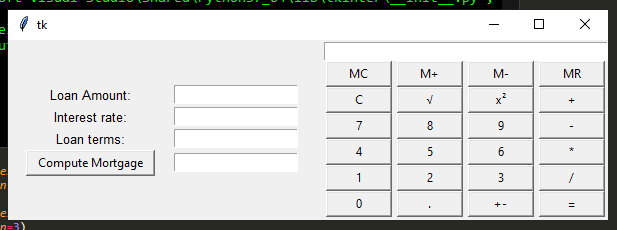

##**Question 5**
Write function collatz() that takes a positive integer x as input and prints the
Collatz sequence starting at x. A Collatz sequence is obtained by repeatedly applying
this rule to the previous number x in the sequence:

    x = {  𝑥/2 𝑖𝑓 𝑥 𝑖𝑠 𝑒𝑣𝑒𝑛
           3𝑥 + 1 𝑖𝑓 𝑥 𝑖𝑠 𝑜𝑑d
Your function should stop when the sequence gets to number 1. Your
implementation must be recursive, without any loops.

In [ ]:
def collatz(n):
    if n == 1:            # if number 1
        print(n)
        return
    elif n % 2 == 0:      # if number even
        print(n)
        n //= 2
    else:                 # if number odd
        print(n)
        n = 3 * n + 1
    collatz(n)

collatz(5)

5
16
8
4
2
1


##**Question 6**
Write a recursive method binary() that takes a non-negative integer n and prints the binary representation of integer n.

In [ ]:
def binary(num):
    if num == 0:
        return 0
    else: 
        return (num % 2 + 10 * binary(num // 2))    # Formula to convert decimal to binary in sequence

binary(10)

1010

##**Question 7**
Implement a class named headingParser that can be used to parse an HTML document, and retrieve and print all the headings in the document. You should implement your class as a subclass of HTMLParser, defined in Standard Library module html.parser. When fed a string containing HTML code, your class should print the headings, one per line and in the order in which they appear in the document. Each heading should be indented as follows: an h1 heading should have indentation 0, and h2 heading should have indentation 1, etc. Test your implementation using w3c.html.


In [59]:
import requests
from html.parser import HTMLParser

class HeadingParser(HTMLParser):

    heading = False
    indent = 0

    def handle_starttag(self, tag, attrs):		
        if tag == "h1":
            self.heading = True
            self.indent=0

        elif tag == "h2":
            self.heading = True
            self.indent=1

        elif tag == "h3":
            self.heading = True
            self.indent=2

        elif tag == "h4":
            self.heading = True
            self.indent=3

        elif tag == "h5":
            self.heading = True
            self.indent=4

        elif tag == "h6":
            self.heading = True
            self.indent=5

    def handle_endtag(self, tag):
        if tag == "h1":
            self.heading = False

        elif tag == "h2":
            self.heading = False

        elif tag == "h3":
            self.heading = False

        elif tag == "h4":
            self.heading = False

        elif tag == "h5":
            self.heading = False

        elif tag == "h6":
            self.heading = False

    def handle_data(self, data):
        if self.heading:
            print("\t"*self.indent + data)


url = requests.get("https://www.w3.org/W3C.html")
htmlCode = url.text

hp = HeadingParser()
hp.feed(htmlCode)

The World Wide Web Consortium
	Who are the W3C members?
	Who are the W3C team members?
	Why should I join?
	Activities of the W3C
	Ways to get involved


##**Question 8**
Implement recursive function webdir() that takes as input: a URL (as a string) and non-negative integers depth and indent. Your function should visit every web page reachable from the starting URL web page in depth clicks or less, and print each web page's URL. As shown below, indentation, specified by indent, should be used to indicate the depth of a URL.

In [54]:
import urllib.request
from urllib.parse import urljoin
from html.parser import HTMLParser

class Collector(HTMLParser):
    'collects hyperlink URLs into a list'

    def __init__(self, url):
        'initializes parser, the url, and a list'
        HTMLParser.__init__(self)
        self.url = url
        self.links = []

    def handle_starttag(self, tag, attrs):
        'collects hyperlink URLs in their absolute format'
        if tag == 'a':
            for attr in attrs:
                if attr[0] == 'href':
                    absolute = urljoin(self.url, attr[1])
                    if absolute[:4] == 'http':
                        self.links.append(absolute)

    def getLinks(self):
        return self.links


url = 'http://www.w3.org/W3C.html'
resource = urllib.request.urlopen(url)
content = resource.read().decode()
collector = Collector(url)
collector.feed(content)
links = collector.getLinks()

['http://www.w3.org/Consortium/Contact.html',
 'http://www.w3.org/Consortium/Prospectus/',
 'http://www.w3.org/Consortium/Recruitment/',
 'http://www.w3.org/Consortium/Prospectus/ActivityList',
 'http://www.w3.org/Talks/',
 'http://www.w3.org/Areas.html',
 'http://www.w3.org/Consortium/Prospectus/FAQ.html',
 'http://www.lcs.mit.edu/',
 'http://www.inria.fr/',
 'http://www.lcs.mit.edu/',
 'http://web.mit.edu/',
 'http://www.inria.fr/',
 'http://www.w3.org/Help/Webmaster.html']

##**Question 9**
Write SQL queries on the below database table that return:
1. All the temperature data.
2. All the cities, but without repetition.
3. All the records for India.
4. All the Fall records.
5. The city, country, and season for which the average rainfall is between 200 and 400 millimeters.
6. The city and country for which the average Fall temperature is above 20
degrees, in increasing temperature order.
7. The total annual rainfall for Cairo.
8. The total rainfall for each season

In [37]:
import sqlite3

# CREATE DATABASE
con = sqlite3.connect('weather.db')
cur = con.cursor()
cur.execute("CREATE TABLE weather (City text, Country text, Season text, Temperature real, Rainfall real)")

In [38]:
# INSERT DATA
data = [('Mumbai', 'India', 'Winter', 24.8, 5.9),
        ('Mumbai', 'India', 'Spring', 28.4, 16.2),
        ('Mumbai', 'India', 'Summer', 27.9, 1549.4),
        ('Mumbai', 'India', 'Fall', 27.6, 346.0),
        ('London', 'United Kingdom', 'Winter', 4.2, 207.7),
        ('London', 'United Kingdom', 'Spring', 8.3, 169.6),
        ('London', 'United Kingdom', 'Summer', 15.7, 157.0),
        ('London', 'United Kingdom', 'Fall', 10.4, 218.5),
        ('Cairo', 'Egypt', 'Winter', 13.6, 16.5),
        ('Cairo', 'Egypt', 'Spring', 20.7, 6.5),
        ('Cairo', 'Egypt', 'Summer', 27.7, 0.1),
        ('Cairo', 'Egypt', 'Fall', 22.2, 4.5)]
for i in data:
    cur.execute("INSERT INTO weather VALUES (?, ?, ?, ?, ?)", i)

In [ ]:
# a)
cur.execute("SELECT Temperature FROM weather")
cur.fetchall()

[(24.8,),
 (28.4,),
 (27.9,),
 (27.6,),
 (4.2,),
 (8.3,),
 (15.7,),
 (10.4,),
 (13.6,),
 (20.7,),
 (27.7,),
 (22.2,)]

In [ ]:
# b)
cur.execute("SELECT DISTINCT City FROM Weather")
cur.fetchall()

[('Mumbai',), ('London',), ('Cairo',)]

In [ ]:
# c)
cur.execute("SELECT * FROM Weather WHERE Country='India'")
cur.fetchall()

[('Mumbai', 'India', 'Winter', 24.8, 5.9),
 ('Mumbai', 'India', 'Spring', 28.4, 16.2),
 ('Mumbai', 'India', 'Summer', 27.9, 1549.4),
 ('Mumbai', 'India', 'Fall', 27.6, 346.0)]

In [ ]:
# d)
cur.execute("SELECT * FROM Weather WHERE Season='Fall'")
cur.fetchall()

[('Mumbai', 'India', 'Fall', 27.6, 346.0),
 ('London', 'United Kingdom', 'Fall', 10.4, 218.5),
 ('Cairo', 'Egypt', 'Fall', 22.2, 4.5)]

In [ ]:
# e)
cur.execute("SELECT City, Country, Season FROM Weather WHERE Rainfall BETWEEN 200 AND 400")
cur.fetchall()

[('Mumbai', 'India', 'Fall'),
 ('London', 'United Kingdom', 'Winter'),
 ('London', 'United Kingdom', 'Fall')]

In [ ]:
# f)
cur.execute("SELECT City, Country FROM Weather WHERE Season='Fall' AND Temperature>20 ORDER BY Temperature")
cur.fetchall()

[('Cairo', 'Egypt'), ('Mumbai', 'India')]

In [ ]:
# g)
cur.execute("SELECT SUM(Rainfall) from Weather WHERE City='Cairo'")
cur.fetchall()

[(27.6,)]

In [ ]:
# h)
cur.execute("SELECT DISTINCT Season, SUM(Rainfall) FROM Weather GROUP BY Season")
cur.fetchall()

[('Fall', 569.0),
 ('Spring', 192.29999999999998),
 ('Summer', 1706.5),
 ('Winter', 230.1)]

##**Question 10**
Write list comprehension expressions

In [ ]:
words = ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

In [ ]:
# a)
[i.upper() for i in words]

['THE', 'QUICK', 'BROWN', 'FOX', 'JUMPS', 'OVER', 'THE', 'LAZY', 'DOG']

In [ ]:
# b)
[i.lower() for i in words]

['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

In [ ]:
# c)
[len(i) for i in words]

[3, 5, 5, 3, 5, 4, 3, 4, 3]

In [ ]:
# d)
[[i.upper(), i.lower(), len(i)] for i in words]

[['THE', 'the', 3],
 ['QUICK', 'quick', 5],
 ['BROWN', 'brown', 5],
 ['FOX', 'fox', 3],
 ['JUMPS', 'jumps', 5],
 ['OVER', 'over', 4],
 ['THE', 'the', 3],
 ['LAZY', 'lazy', 4],
 ['DOG', 'dog', 3]]

In [ ]:
# e)
[i for i in words if len(i)>=4]

['quick', 'brown', 'jumps', 'over', 'lazy']